In [1]:
import numpy as np
import cv2 as cv


In [2]:
img = cv.imread("3.bmp", 0)

In [3]:
print(img.shape)
height, width = img.shape
print(height)
print(width)

(225, 225)
225
225


In [4]:
imagePixels = img.reshape(-1)
print(len(imagePixels))
encodedImage = []
count = 0
prev = imagePixels[0]

for pixel in imagePixels:
    if count >= 255:
        encodedImage.append(255)
        encodedImage.append(prev)
        count = 0
        prev = pixel

    if pixel == prev:
        count += 1
    else:
        encodedImage.append(count)
        encodedImage.append(prev)
        count = 1
        prev = pixel

if count > 1:
    encodedImage.append(count)

encodedImage.append(prev)

print(imagePixels[20:])
print(encodedImage[:20])
encodedImage = np.asarray(encodedImage)
print(type(encodedImage))
print(len(encodedImage))

50625
[7 7 7 ... 7 7 7]
[255, 7, 255, 7, 255, 7, 255, 7, 255, 7, 255, 7, 255, 7, 255, 7, 255, 7, 255, 7]
<class 'numpy.ndarray'>
31864


In [5]:
decode = []
count = ''
n = len(encodedImage)
i = 0
j = i + 1
while i<n:
    count = encodedImage[i]
    for c in range(count):
        pre = encodedImage[i+1]
        decode.append(pre)
    i = i + 2
    
# print(decode)
print(len(decode))
decode = np.asarray(decode)
print(len(decode))

50625
50625


[[ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 [ 7  7  7 ...  7  7  7]
 ...
 [ 7  7  7 ...  4  4  7]
 [ 7  7  7 ...  8 15  7]
 [ 7  7  7 ...  7  7  7]]


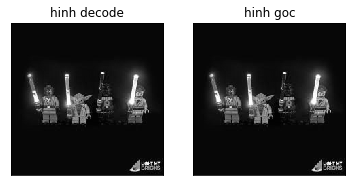

In [6]:
decode = decode.reshape(height, -1)
print(decode)
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.title("hinh decode")
plt.imshow(decode, cmap='gray')
plt.xticks([]), plt.yticks([])


plt.subplot(1,2,2)
plt.title("hinh goc")
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
r = np.sum((img - decode)**2)
print(r)

0


In [8]:
cv.imwrite("3.jpg",decode)

True

In [9]:
len(encodedImage)/len(imagePixels) 

0.6294123456790124